# PIVOT 2022 Geothermal Datathon: SPE - Gulf Coast Section
## Data Modeling: Extracted Thermal Power


#### - Team: 
GeotherML    
    
#### - Team Members:
- Antonio Dagnino
- Andres Calvo
- Oliver Rojas
- Yusuf Falola
- Chandryl Paterne    
    
#### - Contents:

   - **Data Modeling: Extracted Thermal Power**
       - Import inputs and outputs
       - Train / Test split
       - Scale Data
       - Create Neural Network
       - Fit the Model
       

   - **Evaluation Metrics**
       - MAE
       - MSE
       - RMSE
       - Explained variance score
       - Compare mean values per year: Predictions Vs Real



### Data Modeling: Extracted Thermal Power

- Data Modeling Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

In [2]:
# Customize Plots
rcParams['figure.figsize'] = 14,8
rcParams['axes.titlesize'] = 15
rcParams['font.size']=10
sns.set_style('whitegrid')

#show all columns in Jupyter Notebook
pd.set_option("display.max_columns", None)

In [3]:
inputs = pd.read_csv('inputs.csv',index_col=0)
df_Thermal = pd.read_csv('df_Thermal.csv',index_col=0)

- Train / Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(inputs.values,df_Thermal.values,test_size=0.2,random_state=101)

- Scale Data

In [5]:
scaler = MinMaxScaler()

In [6]:
X_train = scaler.fit_transform(X_train)

In [7]:
X_test = scaler.transform(X_test)

In [8]:
X_train.shape

(36388, 37)

In [9]:
X_test.shape

(9097, 37)

- Create Neural Network

In [10]:
model = Sequential()

model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(37,activation='relu'))
model.add(Dense(20))


model.compile(optimizer='adam',loss='mse')

- Fit the Model

In [11]:
# - Hyperparameter Tunning:

batchsize = 128
epochs = 400

In [12]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [13]:
model.fit(x=X_train,
        y=y_train,
        validation_data=(X_test,y_test),
        batch_size=batchsize,
        epochs=epochs,
        verbose=1,
        callbacks=[early_stop])

Epoch 1/400
285/285 [==============================] - 1s 2ms/step - loss: 2140218240.0000 - val_loss: 1975122304.0000
Epoch 2/400
285/285 [==============================] - 0s 2ms/step - loss: 2075990016.0000 - val_loss: 1956270976.0000
Epoch 3/400
285/285 [==============================] - 0s 2ms/step - loss: 2037509120.0000 - val_loss: 1886526208.0000
Epoch 4/400
285/285 [==============================] - 0s 2ms/step - loss: 1961463680.0000 - val_loss: 1834884480.0000
Epoch 5/400
285/285 [==============================] - 1s 2ms/step - loss: 1930111872.0000 - val_loss: 1828304640.0000
Epoch 6/400
285/285 [==============================] - 0s 2ms/step - loss: 1919724032.0000 - val_loss: 1814640000.0000
Epoch 7/400
285/285 [==============================] - 1s 2ms/step - loss: 1915166208.0000 - val_loss: 1813219200.0000
Epoch 8/400
285/285 [==============================] - 0s 2ms/step - loss: 1911165056.0000 - val_loss: 1812591616.0000
Epoch 9/400
285/285 [===========================

285/285 [==============================] - 1s 2ms/step - loss: 1305909760.0000 - val_loss: 1256925056.0000
Epoch 70/400
285/285 [==============================] - 0s 2ms/step - loss: 1292896000.0000 - val_loss: 1219465344.0000
Epoch 71/400
285/285 [==============================] - 0s 2ms/step - loss: 1286232576.0000 - val_loss: 1194689024.0000
Epoch 72/400
285/285 [==============================] - 0s 2ms/step - loss: 1278908416.0000 - val_loss: 1194305408.0000
Epoch 73/400
285/285 [==============================] - 0s 2ms/step - loss: 1267566336.0000 - val_loss: 1180721920.0000
Epoch 74/400
285/285 [==============================] - 0s 2ms/step - loss: 1260193920.0000 - val_loss: 1180947712.0000
Epoch 75/400
285/285 [==============================] - ETA: 0s - loss: 1257155584.00 - 0s 2ms/step - loss: 1252855424.0000 - val_loss: 1194780544.0000
Epoch 76/400
285/285 [==============================] - 0s 2ms/step - loss: 1245810816.0000 - val_loss: 1175817600.0000
Epoch 77/400
285/285 

Epoch 137/400
285/285 [==============================] - 1s 2ms/step - loss: 1109698816.0000 - val_loss: 1082658304.0000
Epoch 138/400
285/285 [==============================] - 0s 2ms/step - loss: 1110233216.0000 - val_loss: 1079456768.0000
Epoch 139/400
285/285 [==============================] - 0s 2ms/step - loss: 1109368320.0000 - val_loss: 1099905920.0000
Epoch 140/400
285/285 [==============================] - 0s 2ms/step - loss: 1112467328.0000 - val_loss: 1078252672.0000
Epoch 141/400
285/285 [==============================] - 1s 2ms/step - loss: 1108533248.0000 - val_loss: 1116706560.0000
Epoch 142/400
285/285 [==============================] - ETA: 0s - loss: 1103186304.00 - 0s 2ms/step - loss: 1099404544.0000 - val_loss: 1083957248.0000
Epoch 143/400
285/285 [==============================] - 1s 2ms/step - loss: 1104008832.0000 - val_loss: 1090687488.0000
Epoch 144/400
285/285 [==============================] - 1s 2ms/step - loss: 1106150912.0000 - val_loss: 1080411136.0000


Epoch 204/400
285/285 [==============================] - 0s 2ms/step - loss: 1043126784.0000 - val_loss: 1043868864.0000
Epoch 205/400
285/285 [==============================] - 0s 2ms/step - loss: 1039690112.0000 - val_loss: 1046757696.0000
Epoch 206/400
285/285 [==============================] - 0s 2ms/step - loss: 1040483264.0000 - val_loss: 1037953280.0000
Epoch 207/400
285/285 [==============================] - 1s 2ms/step - loss: 1033305344.0000 - val_loss: 1055178816.0000
Epoch 208/400
285/285 [==============================] - 1s 2ms/step - loss: 1039718976.0000 - val_loss: 1042709760.0000
Epoch 209/400
285/285 [==============================] - 1s 2ms/step - loss: 1038628096.0000 - val_loss: 1036745920.0000
Epoch 210/400
285/285 [==============================] - 1s 2ms/step - loss: 1035179520.0000 - val_loss: 1068266688.0000
Epoch 211/400
285/285 [==============================] - 1s 2ms/step - loss: 1035643968.0000 - val_loss: 1061628736.0000
Epoch 212/400
285/285 [=========

285/285 [==============================] - 1s 2ms/step - loss: 981408832.0000 - val_loss: 1159162240.0000
Epoch 272/400
285/285 [==============================] - 0s 2ms/step - loss: 998010944.0000 - val_loss: 1051348032.0000
Epoch 273/400
285/285 [==============================] - 1s 2ms/step - loss: 984260608.0000 - val_loss: 1009750656.0000
Epoch 274/400
285/285 [==============================] - 1s 2ms/step - loss: 981980992.0000 - val_loss: 1022232960.0000
Epoch 275/400
285/285 [==============================] - 0s 2ms/step - loss: 983204864.0000 - val_loss: 1014326656.0000
Epoch 276/400
285/285 [==============================] - 0s 2ms/step - loss: 985407872.0000 - val_loss: 1020999744.0000
Epoch 277/400
285/285 [==============================] - 1s 2ms/step - loss: 980996480.0000 - val_loss: 1056073024.0000
Epoch 278/400
285/285 [==============================] - 0s 2ms/step - loss: 973640320.0000 - val_loss: 1029635712.0000
Epoch 279/400
285/285 [==============================]

285/285 [==============================] - 0s 2ms/step - loss: 932890048.0000 - val_loss: 993576448.0000
Epoch 339/400
285/285 [==============================] - 0s 2ms/step - loss: 928679104.0000 - val_loss: 1006130944.0000
Epoch 340/400
285/285 [==============================] - 0s 2ms/step - loss: 945048128.0000 - val_loss: 992323968.0000 ETA: 0s - loss: 942458368.000
Epoch 341/400
285/285 [==============================] - 0s 2ms/step - loss: 932806528.0000 - val_loss: 1004677248.0000
Epoch 342/400
285/285 [==============================] - 0s 2ms/step - loss: 936312512.0000 - val_loss: 992839744.0000
Epoch 343/400
285/285 [==============================] - 0s 2ms/step - loss: 929281344.0000 - val_loss: 989220288.0000
Epoch 344/400
285/285 [==============================] - 0s 2ms/step - loss: 951090112.0000 - val_loss: 998221312.0000
Epoch 345/400
285/285 [==============================] - 0s 2ms/step - loss: 931585664.0000 - val_loss: 1011673792.0000
Epoch 346/400
285/285 [======

In [14]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

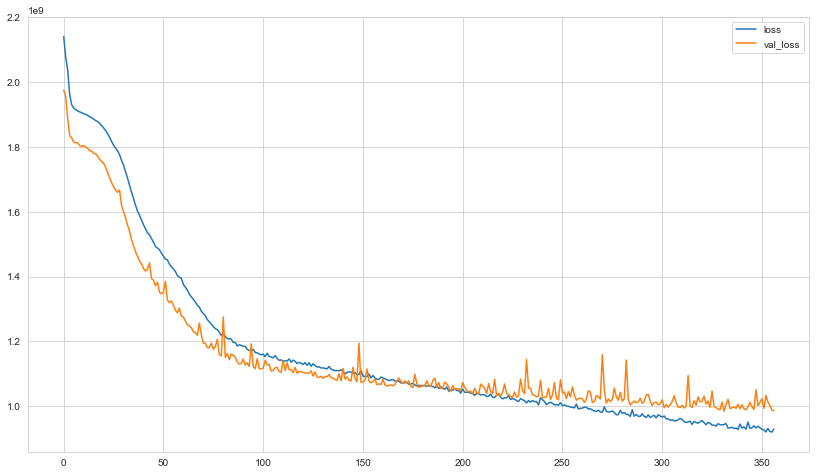

In [15]:
losses.plot()

### Evaluation Metrics

In [16]:
def eval_metrics_timeseries(real_values,pred,name='Variable'):
    print(f"""
        ------- {name} ------
        
MAE: {mean_absolute_error(real_values,pred):.3f},
MSE: {mean_squared_error(real_values,pred):.3f},
RMSE: {np.sqrt(mean_squared_error(real_values,pred)):.3f},
Explained Variance Score: {explained_variance_score(real_values,pred)*100:.3f}%,

Compare Mean values per Year: Predictions VS Real:

{pd.concat([pd.DataFrame(real_values).mean(),pd.DataFrame(pred).mean()],axis=1,keys=['Avg real',' Avg Pred'],names='Year')}
    """)

In [17]:
predictions_Thermal = model.predict(X_test)

In [18]:
eval_metrics_timeseries(y_test,predictions_Thermal,name='Extracted thermal Power (KJ/s)')


        ------- Extracted thermal Power (KJ/s) ------
        
MAE: 14447.514,
MSE: 986192628.297,
RMSE: 31403.704,
Explained Variance Score: 50.256%,

Compare Mean values per Year: Predictions VS Real:

Year      Avg real      Avg Pred
0     15869.373551  15595.935547
1     13124.420794  13199.358398
2     12011.464328  12245.181641
3     11256.124639  11600.135742
4     10681.397884  11105.348633
5     10217.756699  10712.119141
6      9828.400484  10366.557617
7      9494.600307  10087.469727
8      9200.976046   9833.971680
9      8940.896700   9596.735352
10     8705.766134   9391.377930
11     8492.842743   9218.810547
12     8297.599446   9035.027344
13     8117.681475   8878.205078
14     7950.126238   8738.871094
15     7795.000547   8608.989258
16     7650.036376   8481.620117
17     7512.571181   8339.352539
18     7383.389226   8236.674805
19     7261.301960   8133.096191
    


<AxesSubplot:title={'center':'Avg Thermal Power: Predicted Vs Real values'}>

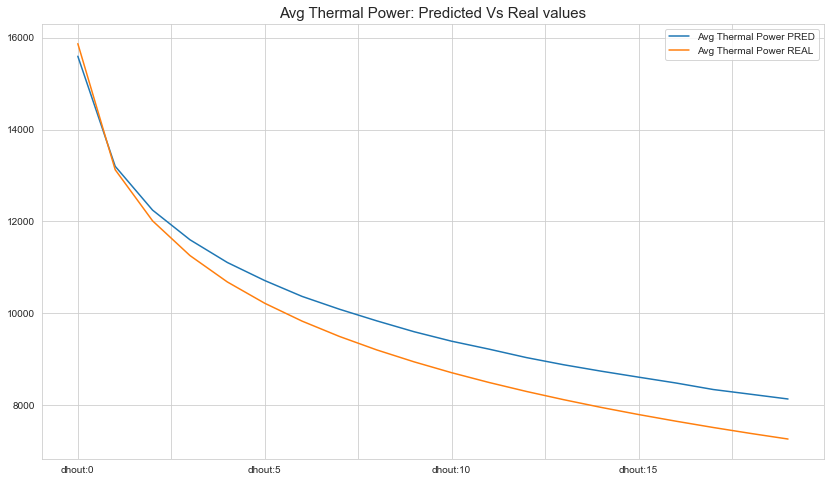

In [19]:
pd.DataFrame(predictions_Thermal,columns=df_Thermal.columns).mean().plot(legend=True,label='Avg Thermal Power PRED',
                                                                           title='Avg Thermal Power: Predicted Vs Real values')
pd.DataFrame(y_test,columns=df_Thermal.columns).mean().plot(legend=True,label='Avg Thermal Power REAL')

### END